In [68]:
import os
import sys
from typing import Dict, List
import numpy as np
import pandas as pd
from copy import deepcopy
import mdtraj as md
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader as PyGDataLoader

from torchvision.io import read_image

class CNN_Dataset(Dataset):
    def __init__(self, sys_data_dir: str, mem_data_dir: str, transform = None):
        super(CNN_Dataset, self).__init__()
        self.sys_data_dir = sys_data_dir
        self.mem_data_dir = mem_data_dir ### In images (png) format
        self.transform = transform

        self.imgs_dir, labels = [], []
        sys_data = pd.read_csv(self.sys_data_dir)
        water_counts = torch.tensor(sys_data["water_counts"].values) 
        sys_file_names = sys_data["sys_filename"].values
        mem_img_list = os.listdir(mem_data_dir)

        for x in range(len(sys_file_names)):
            sys_file_name = sys_file_names[x]
            for y in mem_img_list:
                if sys_file_name == y[:-4]:
                    img_dir = mem_data_dir+y
                    self.imgs_dir.append(img_dir)
                    labels.append(water_counts[x])

        self.labels = np.array(labels, dtype = np.float32)
        self.len = len(self.labels)

    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        img = Image.open(self.imgs_dir[index])
        img = img.convert("RGB")
        img = self.transform(img)
        img = np.array(img) / 255.0
        img = np.moveaxis(img, 2, 0)
        img = torch.from_numpy(img).type(torch.FloatTensor)
        label = self.labels[index]
        return img , label
    



transform = transforms.Compose([
    transforms.CenterCrop((380, 380)),
    transforms.Resize((224, 224)),
])
CNN_Data = CNN_Dataset(
    sys_data_dir='/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv', 
    mem_data_dir='/home/cmu/Desktop/Summer_research/memb_img/', 
    transform= transform
)

train_size = int(0.8 * len(CNN_Data))
test_size = len(CNN_Data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(CNN_Data, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
e = 0
print(len(train_dataloader))
for i, (img, label) in enumerate(train_dataloader):
    e+=1
print(e)


1360


KeyboardInterrupt: 

In [65]:
train = DataLoader(CNN, batch_size=64, shuffle= True)
train_data, train_label = next(iter(train))
img = train_data[0]

print((train_data[0].shape))

torch.Size([3, 224, 224])


In [19]:
from data_cnn import CNNDataset
sys_dir = "/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv" 
mem_dir = "/home/cmu/Desktop/Summer_research/memb_img/"
CNN1 = CNNDataset(sys_dir, mem_dir)
train = DataLoader(CNN1, batch_size=64, shuffle= True)
train_data, train_label = next(iter(train))
img = train_data[0]

print(train_data[0].shape, train_label[0])


torch.Size([4, 500, 500]) tensor(1., dtype=torch.float64)


(224, 224)


AttributeError: ndim

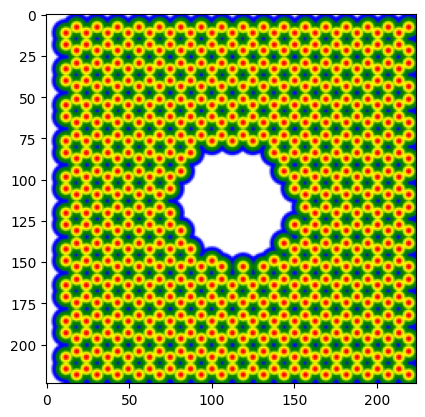

In [37]:
img = Image.open("../../memb_img/circular_49.png")
img = img.convert("RGB")
plt.imshow(img)
from torchvision import transforms

transform = transforms.Compose([
    transforms.CenterCrop((380, 380)),
    transforms.Resize((224, 224))
])
img = transform(img)
print(img.size)
plt.imshow(img)

img = np.rollaxis(img, 2, 0) / 255.0
print(img.shape)
img = torch.from_numpy(img).type(torch.FloatTensor)


In [6]:
import torchvision
ct = 0
resnet = torchvision.models.resnet18(pretrained=True)
for child in resnet.children():
    print("resnet child",child)
    ct += 1
    if ct < 7:
        print("sjdiajsd")

resnet child Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
sjdiajsd
resnet child BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
sjdiajsd
resnet child ReLU(inplace=True)
sjdiajsd
resnet child MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
sjdiajsd
resnet child Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(

In [9]:
import torch
mu = -0.3485
std = 1.2201
m = torch.distributions.Normal(mu, std)
loss = -m.log_prob(torch.Tensor([1]))
loss


tensor([1.7286])

In [102]:
import pandas as pd
sys_data = pd.read_csv("/home/cmu/Desktop/Summer_research/sys_data.csv")
print(sys_data.head())
positions = sys_data["atom_positions"].values
atoms_from_df = sys_data["atoms"].values 
water_counts = sys_data["water_counts"].values
sys_file_names = sys_data["sys_filename"].values
names = []
atom_positions = []
atoms = [] 
counts = []
displacement = []
count = 0 
for x in range(len(sys_file_names)):
    if sys_file_names[x][:12] == "circular_22_":
        names.append(sys_file_names[x][12:])
        atom_positions.append(positions[x])
        atoms.append(atoms_from_df[x])
        counts.append(water_counts[x])
        # if x > 0:
        #     displacement.append(positions[x]-positions[x-1])
        # else:
        #     displacement.append(0)
# df = pd.DataFrame({"names": names, "atom_pos": atom_positions, "atoms": atoms, "water_counts": counts, "displacement": displacement})
df = pd.DataFrame({"names": names, "atom_pos": atom_positions, "atoms": atoms, "water_counts": counts})
df[df["water_counts"] == 2].to_csv("/home/cmu/Desktop/Summer_research/position_data_2.csv", index = False, header= True)
df[df["water_counts"] == 2]

      sys_filename      shape  \
0  circular_8_1439  (1, 6, 3)   
1  circular_27_571  (1, 3, 3)   
2   circular_22_84  (1, 9, 3)   
3  circular_48_375  (1, 6, 3)   
4  circular_15_107  (1, 6, 3)   

                                      atom_positions  \
0  [1.9837 2.1313 9.6744 2.0069 2.2093 9.7326 1.8...   
1  [2.0112 1.9866 9.4599 1.9346 1.9497 9.5125 2.0...   
2  [2.0191 2.0211 9.5876 1.9474 2.0583 9.6466 2.0...   
3  [2.0187 2.1102 9.6702 2.0223 2.1193 9.5707 2.0...   
4  [2.0403 2.0235 9.5979 2.0483 2.0328 9.4987 1.9...   

                                           atoms  water_counts  
0                 ['O', 'H', 'H', 'O', 'H', 'H']           2.0  
1                                ['O', 'H', 'H']           1.0  
2  ['O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H']           3.0  
3                 ['O', 'H', 'H', 'O', 'H', 'H']           2.0  
4                 ['O', 'H', 'H', 'O', 'H', 'H']           2.0  


,names,atom_pos,atoms,water_counts
1,41,[2.0168 1.9832 9.5555 1.9214 1.965 9.5793 2.0...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
3,466,[1.9865 1.9221 9.5913 2.01 2.0115 9.6293 2.0...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
5,1197,[1.9932 2.0689 9.6303 2.0506 2.1253 9.6896 1.9...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
7,1339,[2.0153 1.9316 9.6342 2.0222 1.9018 9.539 2.0...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
8,240,[2.0118 2.0598 9.6128 1.9549 1.9874 9.6518 2.1...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
...,...,...,...,...
1969,934,[2.0428 2.0704 9.6328 2.0326 2.0627 9.5337 2.1...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
1971,540,[1.9313 1.9938 9.6767 2.0075 1.9574 9.7303 1.9...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
1972,1323,[2.0694 1.957 9.4562 2.0466 1.8732 9.4066 2.1...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
1974,388,[2.025 1.948 9.6268 1.9253 1.9477 9.6348 2.0...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0


In [5]:
import os
import sys
from typing import Dict, List
import numpy as np
import pandas as pd
from copy import deepcopy
import mdtraj as md
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader as PyGDataLoader

from torchvision.io import read_image
# pos_data = pd.read_csv("/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv")

data_dir = "/home/cmu/Desktop/Summer_research/position_data_2.csv"

class Diffusion_Dataset(Dataset):
    def __init__(self, data_dir: str, sys_dir = None, name = "circular_22_"):
        super(Diffusion_Dataset, self).__init__()
        self.data_dir = data_dir
        self.name = name
        sys_data = pd.read_csv("/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv")
        sys_file_names = sys_data["sys_filename"]
        # data_dir = "/home/cmu/Desktop/Summer_research/position_data_2.csv"
        # sys_dir = "/home/cmu/Desktop/Summer_research/sys_pdb/"
        # name = "circular_22_"

        positions = []
        pos_2_data = pd.read_csv(self.data_dir)
        timestamps = pos_2_data["names"].values

        for x in range(len(timestamps)):
            file_name = name+str(timestamps[x])
            traj = md.load_pdb(sys_dir+file_name+".pdb")
            pos = traj.xyz[0].flatten()
            positions.append(pos)

        ### normalize positions
        # mean, std, var = np.mean(positions), np.std(positions), np.var(positions)
        # # print(mean, std, var)
        # positions = (positions - mean)/std
        # mean, std, var = np.mean(positions), np.std(positions), np.var(positions)
        # print(mean, std, var)
        
        ### Normalization done
        positions = np.array(positions)
        previous = positions[:-1]
        displacements=(positions[1:] - previous)                  
        self.positions = np.array(positions, dtype = np.float32)
        self.labels = np.array(displacements, dtype = np.float32)
        # self.labels.append(np.zeros_like(self.labels[0]))

        print(self.labels.shape)
        self.len = len(self.labels)

    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        return self.positions[index] , self.labels[index]
    



Diffusion_Data = Diffusion_Dataset(
    data_dir = "/home/cmu/Desktop/Summer_research/position_data_2.csv",
    sys_dir = "/home/cmu/Desktop/Summer_research/sys_pdb/",
    name = "circular_22_",
)

train_size = int(0.8 * len(Diffusion_Data))
test_size = len(Diffusion_Data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(Diffusion_Data, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
e = 0
print(len(train_dataloader))
print((next(enumerate(train_dataloader))[1][1][2]))


(1399, 18)
18
tensor([ 0.0549, -0.0004, -0.0278,  0.0471,  0.0383, -0.0434,  0.0497,  0.0239,
        -0.0589,  0.0411, -0.1124, -0.0098, -0.0968, -0.2175, -0.0720,  0.0320,
        -0.0859, -0.0042])


In [6]:
from tqdm import tqdm
data_dir = "/home/cmu/Desktop/Summer_research/position_data_2.csv"
sys_dir = "/home/cmu/Desktop/Summer_research/sys_pdb/"
sys_data = pd.read_csv("/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv")
sys_file_names = sys_data["sys_filename"]
positions, labels = [], []
pos_2_data = pd.read_csv(data_dir)
name = "circular_22_"
timestamps = pos_2_data["names"].values

for x in timestamps:
    file_name = name+str(x)
    traj = md.load_pdb(sys_dir+file_name+".pdb")
    pos = traj.xyz[0].flatten()
    positions.append(pos)

displacements = []
for x in range(len(positions)):
    if x == 0:
        displacements.append(0)
    else:
        displacement = positions[x]- positions[x-1]
        displacements.append(displacement)
import torch
x = torch.Tensor(displacements[1])
print(x)
print(torch.randn_like(x))


tensor([-0.0303, -0.0611,  0.0358,  0.0886,  0.0465,  0.0500, -0.0633, -0.1024,
         0.0260, -0.0930, -0.0716,  0.0227,  0.0171, -0.1505,  0.0144, -0.1129,
        -0.0488,  0.0264])
tensor([-1.0299,  0.6873, -1.2551,  0.4016,  0.2823, -0.2811, -0.3666, -1.3710,
        -0.7129, -0.6393, -1.4668, -0.1875,  0.3967,  0.2453,  0.2711, -0.6620,
         0.8278,  1.0901])


In [78]:
import pandas as pd
import numpy as np
sys_data = pd.read_csv("/home/cmu/Desktop/Summer_research/sys_data.csv")
atom_pos = sys_data["atom_positions"].apply(eval)
atom_pos_1 = atom_pos[4]
atom_pos_2 = atom_pos[0]
print(type(atom_pos_1[0]))
print(atom_pos_1[1])
x = atom_pos_2-atom_pos_1
x

SyntaxError: invalid syntax (<string>, line 1)

In [23]:
import mdtraj as md

traj = md.load_pdb('/home/cmu/Desktop/Summer_research/sys_pdb/circular_22_1972.pdb')
print(traj)
top = traj.topology
print(top)
print(traj.xyz.shape)
pos = np.array(traj.xyz[0])
print(pos)


<mdtraj.Trajectory with 1 frames, 6 atoms, 2 residues, and unitcells>
<mdtraj.Topology with 1 chains, 2 residues, 6 atoms, 0 bonds>
(1, 6, 3)
[[2.0166 1.8677 9.5929]
 [2.0718 1.8924 9.6726]
 [1.9364 1.8159 9.6226]
 [2.0934 1.908  9.3394]
 [2.0435 1.874  9.4191]
 [2.057  1.9972 9.3128]]


In [115]:
pos = [3,1,2]
np.zeros_like(pos)

array([0, 0, 0])

In [42]:
import torch.nn as nn
import math
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = "cpu"
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * - embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        in_size = 4
        # x = nn.Sequential(
        #     SinusoidalPositionEmbeddings(in_size),
        #     nn.Linear(in_size, in_size*4),
        #     nn.GELU(),
        #     nn.Linear(in_size*4, in_size*4),
        # )
        return embeddings

model =SinusoidalPositionEmbeddings(4)
x = model(torch.Tensor(np.arange(0,100)))
x.shape

torch.Size([100, 4])

In [27]:
time = torch.Tensor(np.arange(0,100))
in_size = 4
time_mlp = nn.Sequential(
    SinusoidalPositionEmbeddings(in_size),
    nn.Linear(in_size, in_size*4),
    nn.GELU(),
    nn.Linear(in_size*4, in_size*4),
)
t = time_mlp(time)
t.shape

torch.Size([100, 16])

In [31]:
timesteps = 3000
batch_size = 1120
device = "cuda:0"
t = torch.randint(0, timesteps, (batch_size,), device=device).long()
t.shape


torch.Size([1120])

In [99]:
import torch.nn as nn
import math
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = "cpu"
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1) 
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        # print(time[:, None])
        # print(embeddings[None, :])
        embeddings = (time[:, None] * embeddings[None, :]).squeeze(1)
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings
    
class Denoise_model(nn.Module):
    def __init__(self, in_size, out_size = 18, time_mlp_in_size = 8):
        super(Denoise_model, self).__init__()
        self.time_mlp_in_size = time_mlp_in_size
        self.in_size = in_size 
        self.out_size = out_size

        self.time_mlp = nn.Sequential(
            SinusoidalPositionEmbeddings(self.time_mlp_in_size),
            nn.Linear(self.time_mlp_in_size, self.time_mlp_in_size*4),
            nn.GELU(),
            nn.Linear(self.time_mlp_in_size*4, self.time_mlp_in_size*4),
        )

        self.model = nn.Sequential(
            nn.Linear(self.in_size, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 2048),
            nn.ReLU(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Linear(512, 256)
        )
        self.output = nn.Linear(256+self.time_mlp_in_size*4, self.out_size)


     
    def forward(self, x, t ):
        # time = self.time_mlp(t).reshape(4, 32)
        time = self.time_mlp(t)
        print("time.shape=", time.shape)
        print("x.shape = ", x.shape)
        
        print("time = ", time)
        res = self.model(x)
        x = torch.cat((res, time), -1)
        print(x)

        res = self.output(x)
        return res

SyntaxError: non-default argument follows default argument (2142035031.py, line 20)

In [98]:
model = Denoise_model(18, 18, 8)
test_x = torch.Tensor([np.random.randint(0, 18, (18, )) for x in range(0, 4)])
print("test_x =", test_x)
t = torch.Tensor([np.random.randint(25, 40, (4, )) for x in range(0, 4)])
print("t =", t)
print("t shape = ", t.shape)

y = model(test_x,t )
y

test_x = tensor([[ 2., 12.,  9., 15., 17.,  7.,  7., 16.,  6., 13.,  1.,  1.,  6.,  2.,
          9.,  2., 17., 14.],
        [ 5., 15.,  4., 10., 16.,  0., 10., 15.,  5.,  0., 12.,  6., 17.,  6.,
          9.,  8.,  0.,  5.],
        [12.,  4.,  2., 10.,  1., 12., 16.,  2.,  8., 11.,  5., 14., 10.,  6.,
          8., 11.,  9.,  4.],
        [ 8., 17.,  4., 14., 14.,  9., 15., 11.,  1.,  4.,  3., 10.,  8.,  4.,
          7., 17., 10., 14.]])
t = tensor([[35., 39., 29., 34.],
        [29., 39., 28., 34.],
        [32., 35., 26., 31.],
        [39., 28., 38., 27.]])
t shape =  torch.Size([4, 4])
time.shape= torch.Size([4, 32])
x.shape =  torch.Size([4, 18])
time =  tensor([[-0.0354,  0.1082,  0.0762,  0.2456, -0.0083, -0.1477,  0.1584,  0.0942,
          0.1943, -0.1690,  0.1085,  0.0466, -0.1180,  0.1687, -0.0796,  0.1257,
          0.3107, -0.1266,  0.0319, -0.0747,  0.2698,  0.0250, -0.1984,  0.4264,
          0.1681, -0.1758, -0.1394, -0.1173,  0.0119, -0.1987, -0.1318,  0.0205],
   

tensor([[-0.1618, -0.0403, -0.0915, -0.0083, -0.0641, -0.0578, -0.0151,  0.0271,
          0.1937, -0.0088,  0.0592, -0.1474, -0.0554, -0.0200, -0.0216, -0.0181,
         -0.0389, -0.0993],
        [-0.1570, -0.0591, -0.0484,  0.0510, -0.0005, -0.0351, -0.0122, -0.0006,
          0.1883, -0.0558,  0.0160, -0.1315, -0.0984, -0.0667, -0.0774,  0.0272,
         -0.0689, -0.1351],
        [-0.1192, -0.0474,  0.0235,  0.0108,  0.0090, -0.1075, -0.0092,  0.1356,
          0.1283,  0.0206,  0.0549, -0.1039, -0.0167, -0.0884, -0.0975, -0.0058,
         -0.0392, -0.1011],
        [-0.1245, -0.0065, -0.0362,  0.0307,  0.0459, -0.0624, -0.0278,  0.1142,
          0.1600,  0.0420,  0.0943, -0.1141,  0.0062, -0.0808, -0.0408, -0.0209,
         -0.0149, -0.0836]], grad_fn=<AddmmBackward0>)

In [2]:
from dataset.data_diffusion_demo import Diffusion_Dataset
from Diffusion import DiffusionModel
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from tqdm import tqdm
import torch
from torch import nn
from torch.optim import Adam, lr_scheduler
from simple_diffusion import Denoise_model

import math


def cal_angle(point_a, point_b, point_c):
    """
    根据三点坐标计算夹角

                  点a
           点b ∠
                   点c

    :param point_a、point_b、point_c: 数据类型为list,二维坐标形式[x、y]或三维坐标形式[x、y、z]
    :return: 返回角点b的夹角值


    数学原理：
    设m,n是两个不为0的向量，它们的夹角为<m,n> (或用α ,β, θ ,..,字母表示)

    1、由向量公式：cos<m,n>=m.n/|m||n|

    2、若向量用坐标表示，m=(x1,y1,z1), n=(x2,y2,z2),

    则,m.n=(x1x2+y1y2+z1z2).

    |m|=√(x1^2+y1^2+z1^2), |n|=√(x2^2+y2^2+z2^2).

    将这些代入②得到：

    cos<m,n>=(x1x2+y1y2+z1z2)/[√(x1^2+y1^2+z1^2)*√(x2^2+y2^2+z2^2)]

    上述公式是以空间三维坐标给出的，令坐标中的z=0,则得平面向量的计算公式。

    两个向量夹角的取值范围是：[0,π].

    夹角为锐角时，cosθ>0；夹角为钝角时,cosθ<0.

    """
    a_x, b_x, c_x = point_a[0], point_b[0], point_c[0]  # 点a、b、c的x坐标
    a_y, b_y, c_y = point_a[1], point_b[1], point_c[1]  # 点a、b、c的y坐标

    if len(point_a) == len(point_b) == len(point_c) == 3:
        # print("坐标点为3维坐标形式")
        a_z, b_z, c_z = point_a[2], point_b[2], point_c[2]  # 点a、b、c的z坐标
    else:
        a_z, b_z, c_z = 0,0,0  # 坐标点为2维坐标形式，z 坐标默认值设为0
        # print("坐标点为2维坐标形式，z 坐标默认值设为0")

    # 向量 m=(x1,y1,z1), n=(x2,y2,z2)
    x1,y1,z1 = (a_x-b_x),(a_y-b_y),(a_z-b_z)
    x2,y2,z2 = (c_x-b_x),(c_y-b_y),(c_z-b_z)

    # 两个向量的夹角，即角点b的夹角余弦值
    cos_b = (x1*x2 + y1*y2 + z1*z2) / (math.sqrt(x1**2 + y1**2 + z1**2) *(math.sqrt(x2**2 + y2**2 + z2**2))) # 角点b的夹角余弦值
    B = math.degrees(math.acos(cos_b)) # 角点b的夹角值
    return B

def cal_distance(point_a, point_b):
    sum = pow((point_a[0] - point_b[0]), 2) + pow((point_a[1] - point_b[1]), 2) + pow((point_a[2] - point_b[2]), 2)
    return math.sqrt(sum)


batch_size = 1120


Diffusion_Data = Diffusion_Dataset(
    data_dir = "/home/cmu/Desktop/Summer_research/position_data_2.csv",
    sys_dir = "/home/cmu/Desktop/Summer_research/sys_pdb/",
    name = "circular_22_",
)
train_size = int(0.8 * len(Diffusion_Data))
test_size = len(Diffusion_Data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(Diffusion_Data, [train_size, test_size])
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=7)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=7)
print('training set size:', len(train_dataset))
print('testing set size:', len(test_dataset))

# hidden_dim = 1024
# zdim = 40
# encoder = Encoder(18, hidden_dim, zdim)
# decoder = Decoder(zdim, hidden_dim, 18)
train_losses, test_losses = [], []

timesteps = 7000
epoches = 2000

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_save_path = "/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/"
time_mlp_in_size = 20

denoise_model = Denoise_model(in_size = 18, out_size= 18, time_mlp_in_size = time_mlp_in_size).to(device)
denoise_model.load_state_dict(torch.load("/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/BestModel_MLP_emd_dim_16.pth"))
lr = 0.00001

optimizer = Adam(denoise_model.parameters(), lr=lr)
noise_scale = 0.1
model = DiffusionModel(timesteps=timesteps, denoise_model = denoise_model, loss_type= "l1")
model.load_state_dict(torch.load("/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/BestModel_Diff_emd_dim_16.pth"))


with torch.no_grad():
    model.eval()
    times = [200 ,500, 800, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000, 6500]
    samples = []
    for time in times:
        sample = model(mode="generate", displacement_shape = 18, batch_size = 4, timesteps_sample = time)
        # print("time = ", time, "result =" , sample[-1]*3.535067+4.4975667)
        samples.append(sample[-1]*3.535067+4.4975667)

angles_all = []
bond_len_all = []
for x in range(len(samples)):
    angles = []
    bond_lens = []
    for y in samples[x]:
        for z in range(0, len(y), 9):
            angle = cal_angle(y[z+3:z+6], y[z:z+3] ,y[z+6:z+9])
            angles.append(angle)
            bond_len1 = cal_distance(y[z:z+3], y[z+3:z+6])
            bond_len2 = cal_distance(y[z:z+3], y[z+6:z+9])
            bond_lens.append(bond_len1)
            bond_lens.append(bond_len2)
    bond_len_all.append(bond_lens)
    angles_all.append(angles)
    print("current timesteps = ", times[x], "angles are:", angles, "bond_lens:", bond_lens,  "angles mean is:", sum(angles)/len(angles), "bond length mean is:", sum(bond_lens)/len(bond_lens))

for x in range(len(times)):
    print("current timesteps = ", times[x],  "angles mean is:", sum(angles_all[x])/len(angles_all[x]), "bond length mean is:", sum(bond_len_all[x])/len(bond_len_all[x]))




[2.0273046 1.9712732 9.537093  2.0279317 1.9765526 9.552533  2.0245256
 1.9664096 9.546699  2.027873  1.9693326 9.437345  2.0301685 1.9696349
 9.445996  2.0288558 1.9688513 9.447838 ] [0.04647465 0.06699497 0.13052559 0.07101833 0.08737847 0.14436314
 0.07251972 0.08733562 0.14856118 0.04608815 0.06531669 0.12945406
 0.07016708 0.08510289 0.14662407 0.0713829  0.08671561 0.14829439] [0.00215989 0.00448833 0.01703693 0.0050436  0.007635   0.02084072
 0.00525911 0.00762751 0.02207042 0.00212412 0.00426627 0.01675835
 0.00492342 0.0072425  0.02149862 0.00509552 0.0075196  0.02199123]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
training set size: 1120
testing set size: 280
generating
(4, 18)


sampling loop time step:   3%|▎         | 200/7000 [00:00<00:05, 1298.30it/s]


generating
(4, 18)


sampling loop time step:   7%|▋         | 500/7000 [00:00<00:04, 1308.94it/s]


generating
(4, 18)


sampling loop time step:  11%|█▏        | 800/7000 [00:00<00:04, 1423.98it/s]


generating
(4, 18)


sampling loop time step:  14%|█▍        | 1000/7000 [00:00<00:04, 1444.94it/s]


generating
(4, 18)


sampling loop time step:  21%|██▏       | 1500/7000 [00:01<00:03, 1414.81it/s]


generating
(4, 18)


sampling loop time step:  29%|██▊       | 2000/7000 [00:01<00:03, 1446.53it/s]


generating
(4, 18)


sampling loop time step:  36%|███▌      | 2500/7000 [00:01<00:03, 1401.46it/s]


generating
(4, 18)


sampling loop time step:  43%|████▎     | 3000/7000 [00:02<00:02, 1403.58it/s]


generating
(4, 18)


sampling loop time step:  57%|█████▋    | 4000/7000 [00:02<00:02, 1424.60it/s]


generating
(4, 18)


sampling loop time step:  71%|███████▏  | 5000/7000 [00:03<00:01, 1434.92it/s]


generating
(4, 18)


sampling loop time step:  86%|████████▌ | 6000/7000 [00:04<00:00, 1462.68it/s]


generating
(4, 18)


sampling loop time step:  93%|█████████▎| 6500/7000 [00:04<00:00, 1466.55it/s]

current timesteps =  200 angles are: [78.68683298592343, 116.87031638499224, 65.72425279515068, 37.97823975786415, 30.622593996458725, 18.052876774129206, 10.361859452018166, 59.50357854403814] bond_lens: [5.50805803907523, 2.93077432520637, 5.070970492765339, 7.971919509568645, 6.228130296481734, 6.216149539387064, 6.897115166797821, 7.6475814600448455, 7.353524322922651, 11.356796093237648, 6.295308616961267, 5.690638953081489, 8.898994725849613, 10.719810920587696, 3.6358000876501415, 12.548070153638879] angles mean is: 52.225068836321846 bond length mean is: 7.185602668953527
current timesteps =  500 angles are: [52.93118453104166, 39.893434658832575, 46.409460693037964, 99.97432017082816, 31.313205448042307, 27.15608539348152, 15.075715186654792, 55.49618967275518] bond_lens: [3.4353111141138335, 4.199240594458232, 7.298412429892233, 3.698985582675695, 2.210247781481622, 2.5247452209737906, 6.087727989916531, 2.7303241690173827, 12.66889852563186, 4.90173745008985, 3.7697688516888

/home/cmu/miniconda3/envs/diffusion/lib/python3.8/site-packages/ase/lattice/surface.py:17: UserWarning: Moved to ase.build
  warnings.warn('Moved to ase.build')
/tmp/ipykernel_16249/1262492133.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = pyplot.subplots()


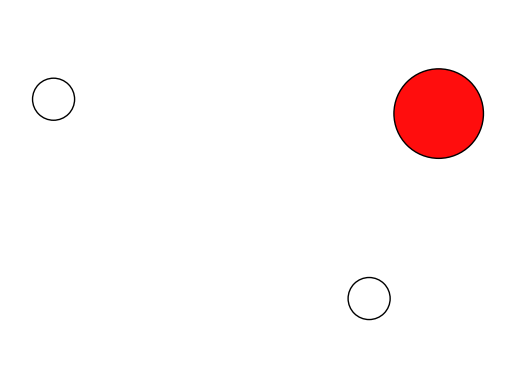

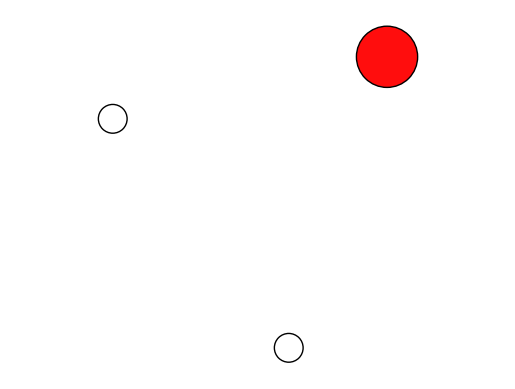

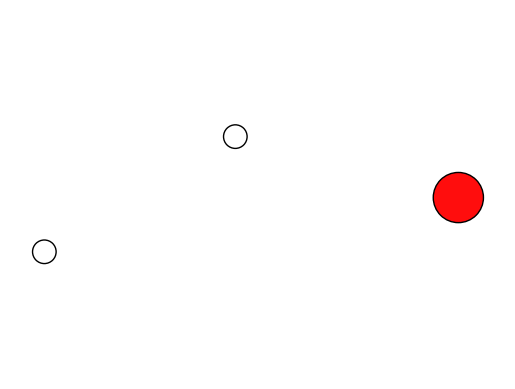

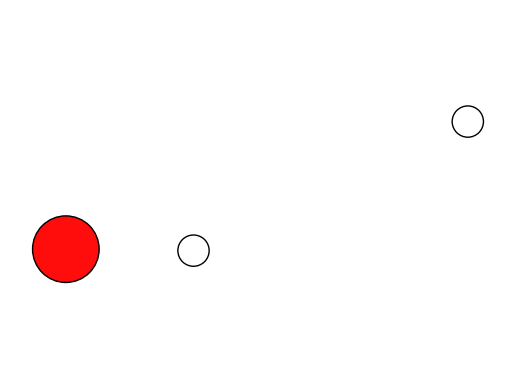

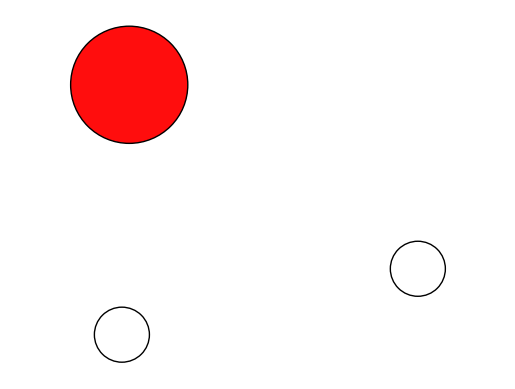

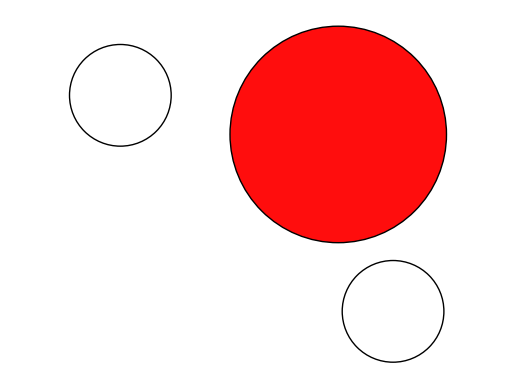

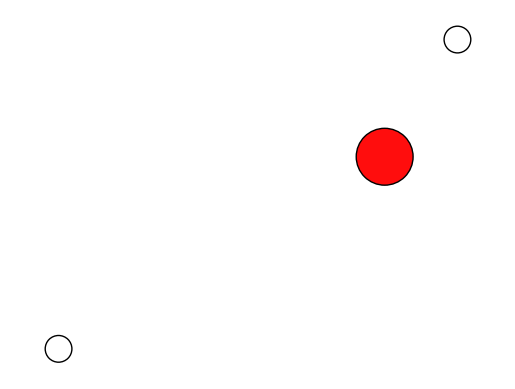

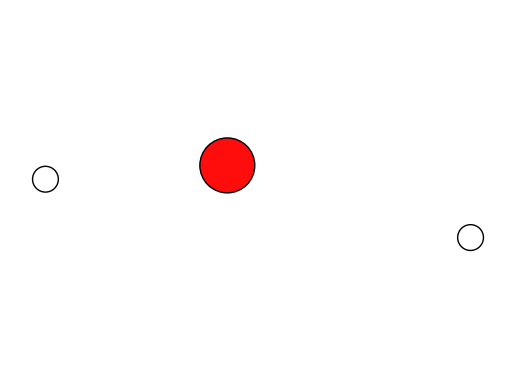

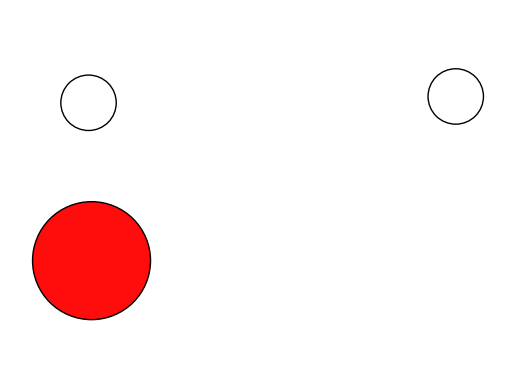

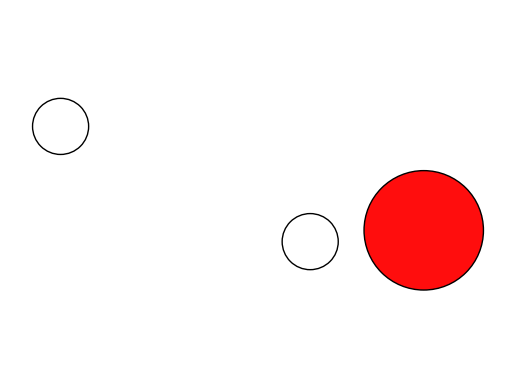

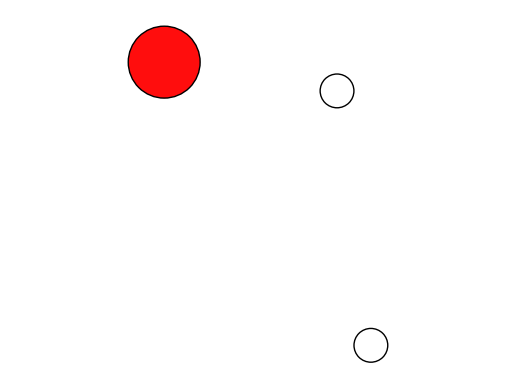

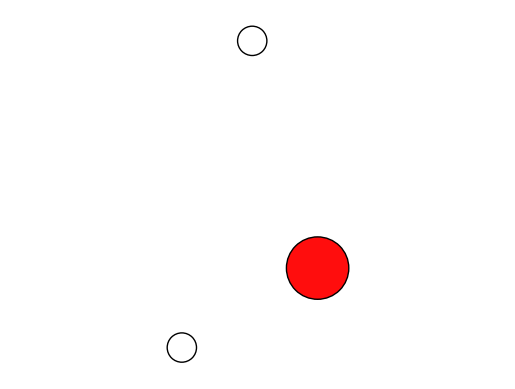

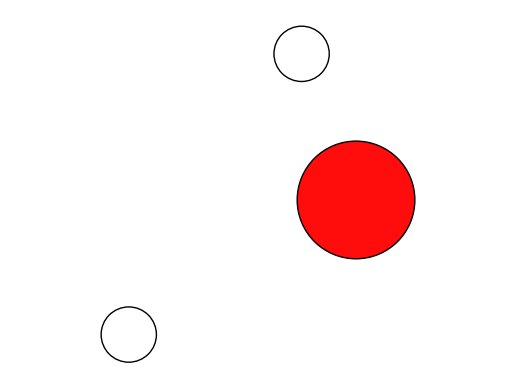

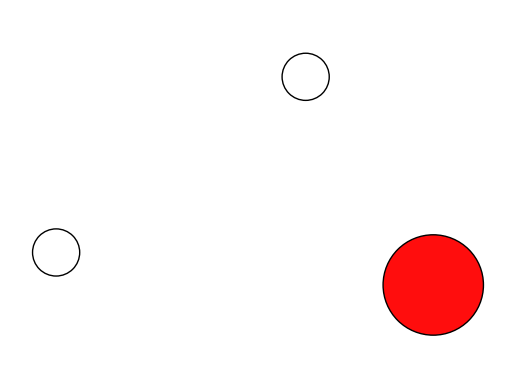

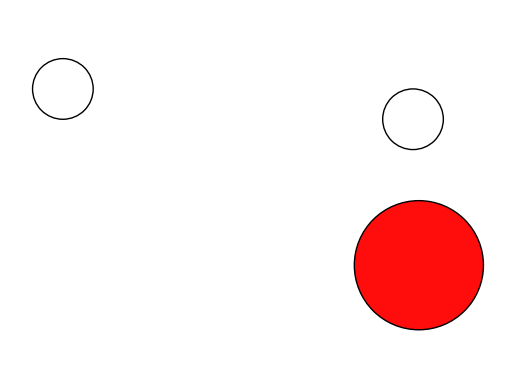

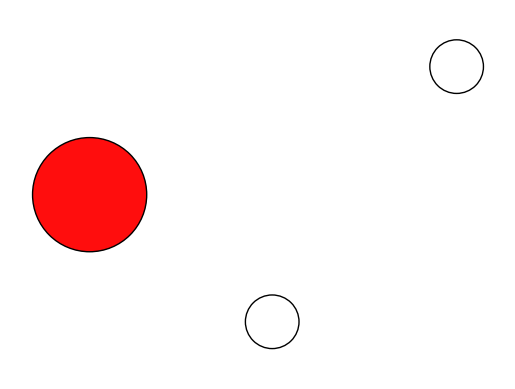

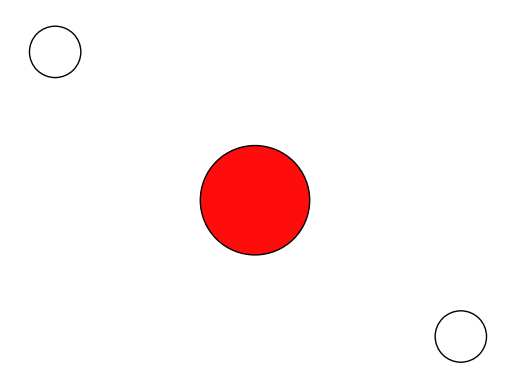

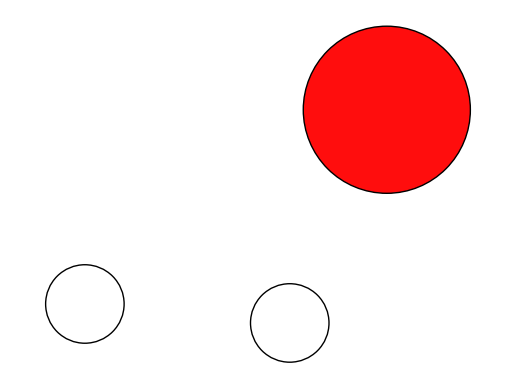

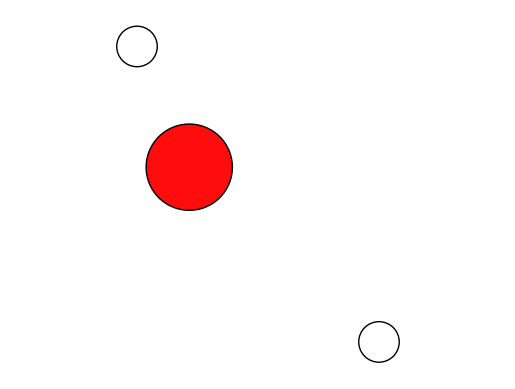

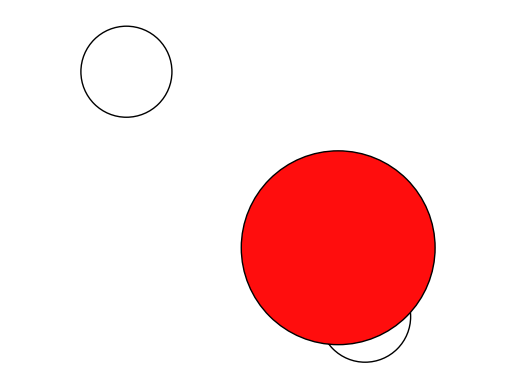

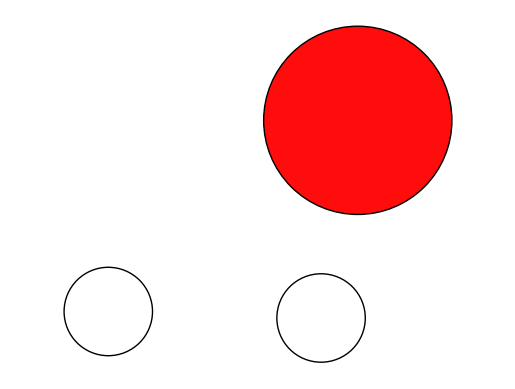

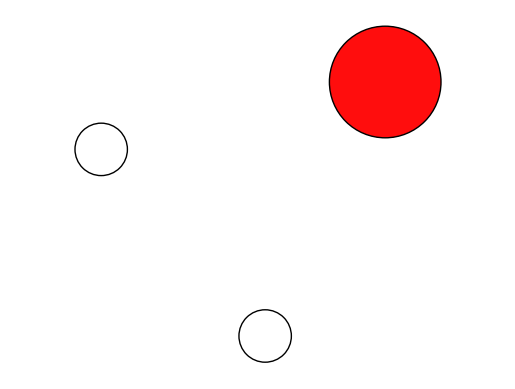

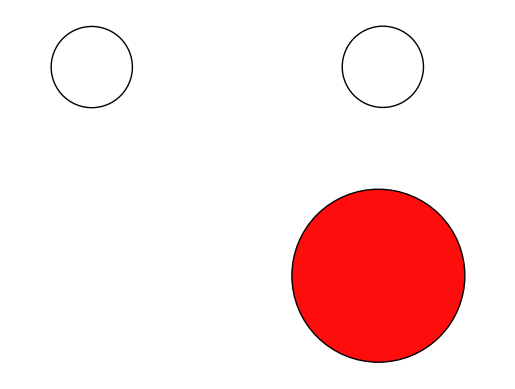

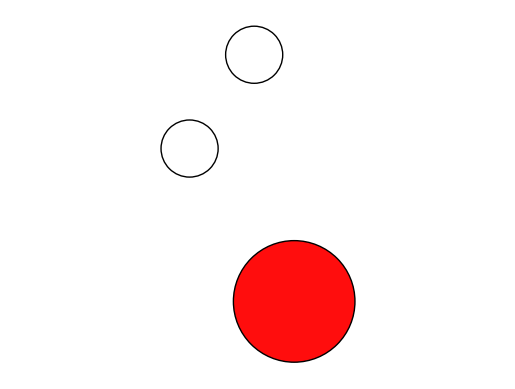

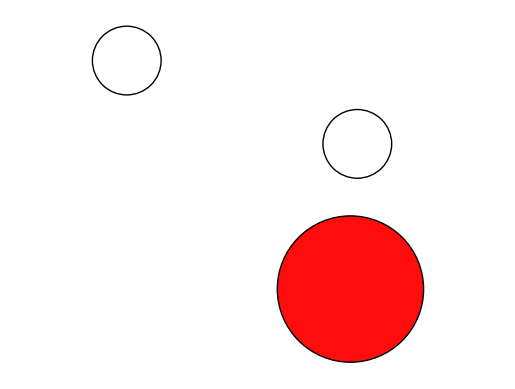

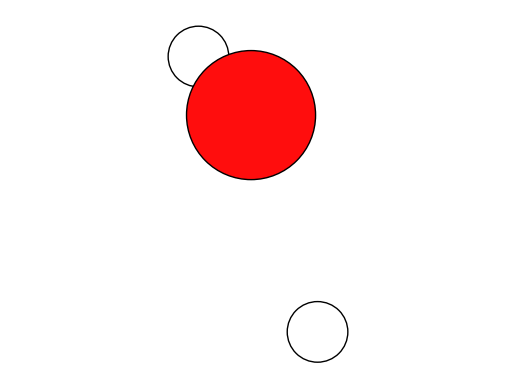

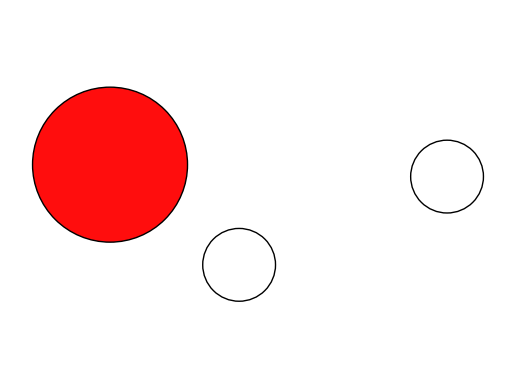

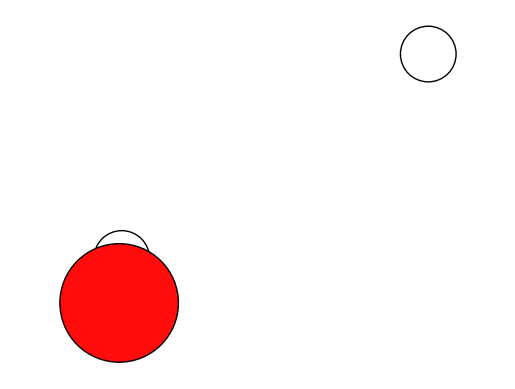

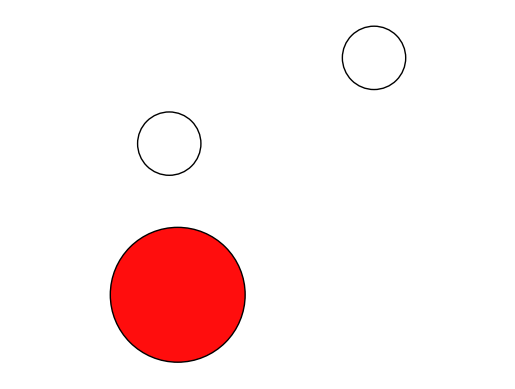

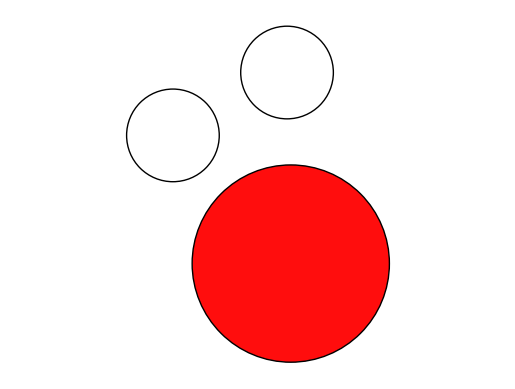

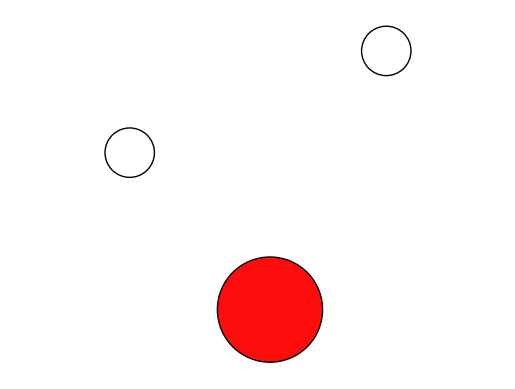

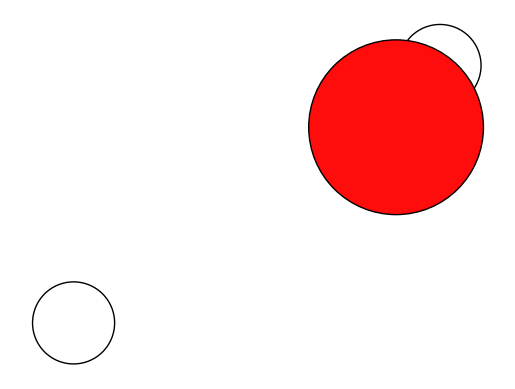

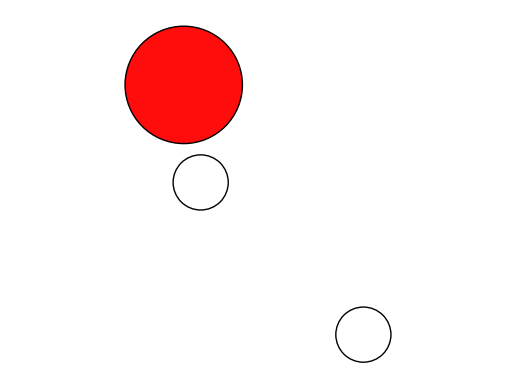

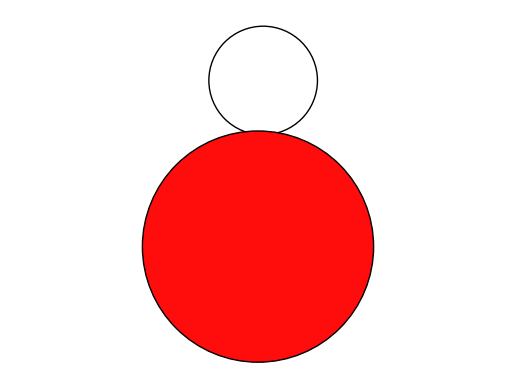

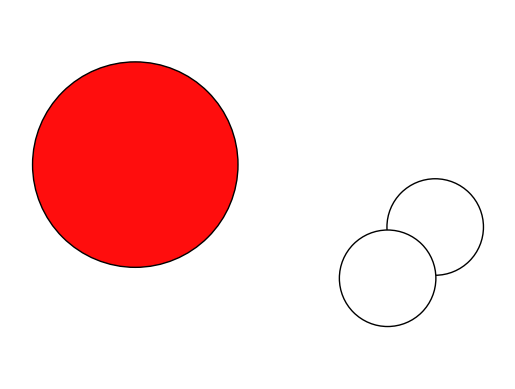

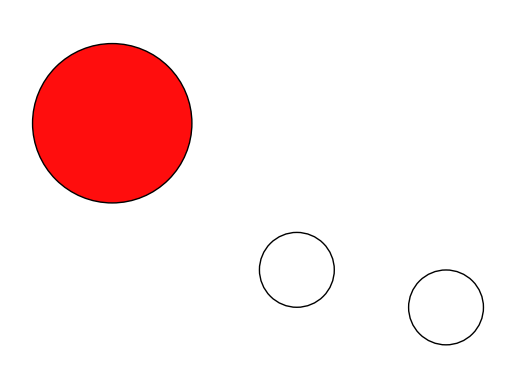

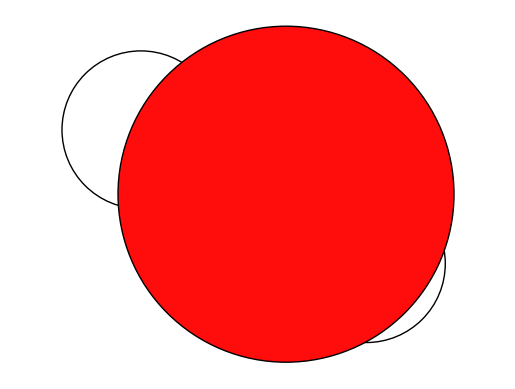

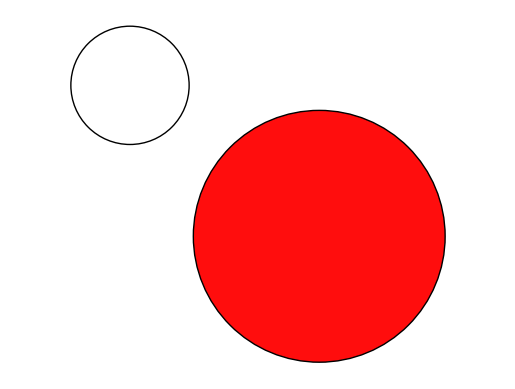

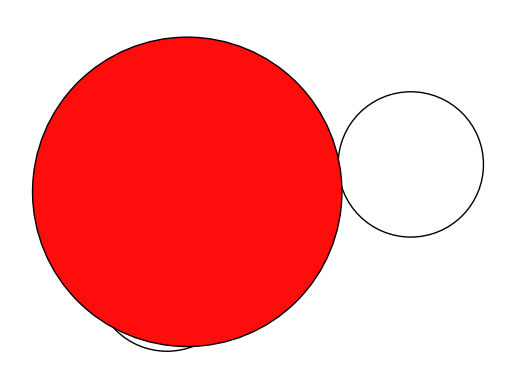

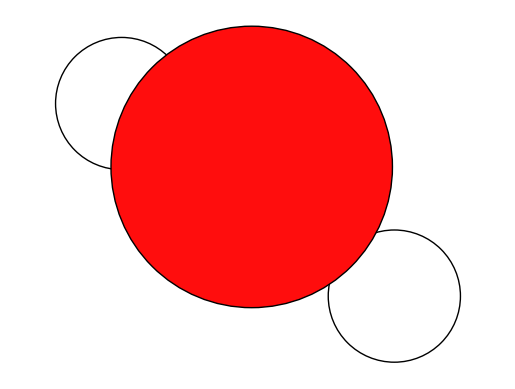

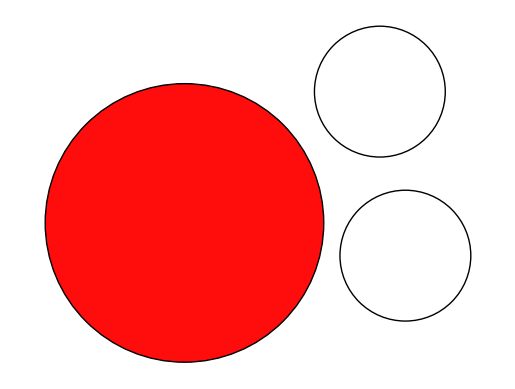

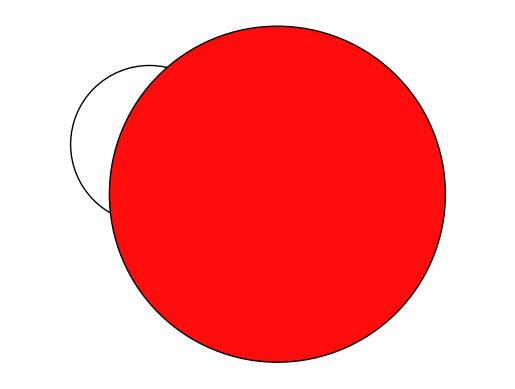

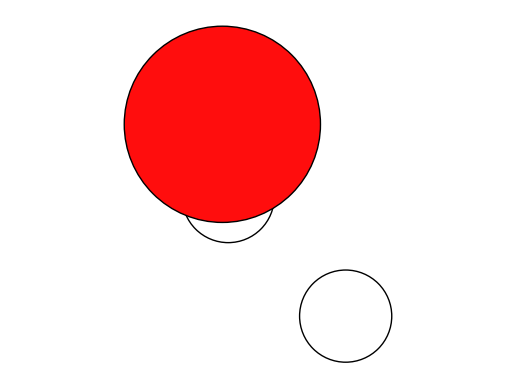

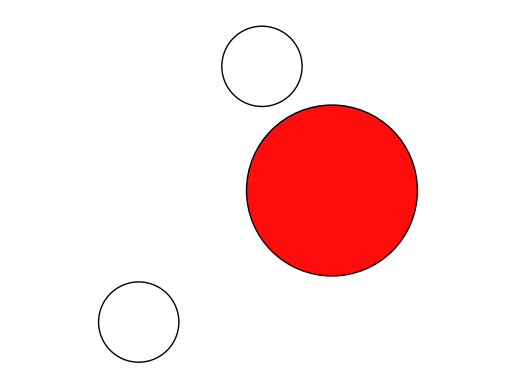

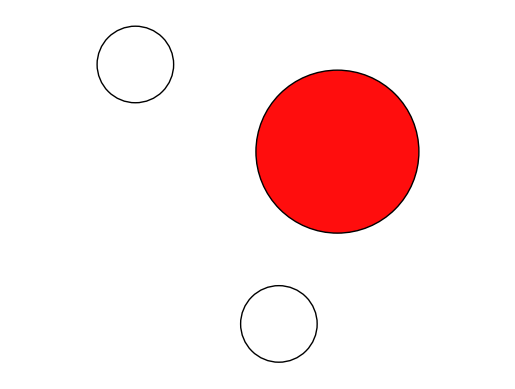

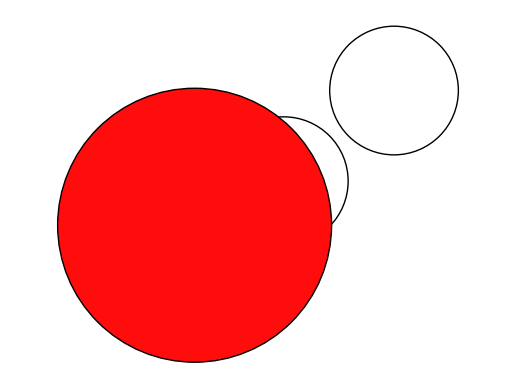

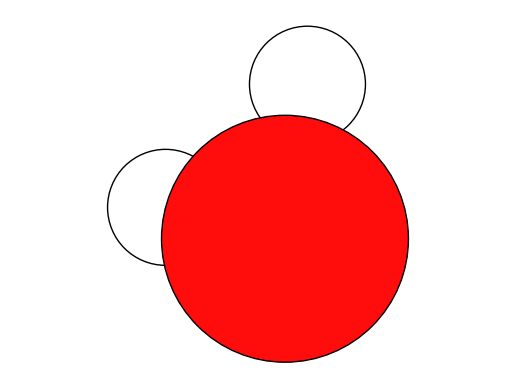

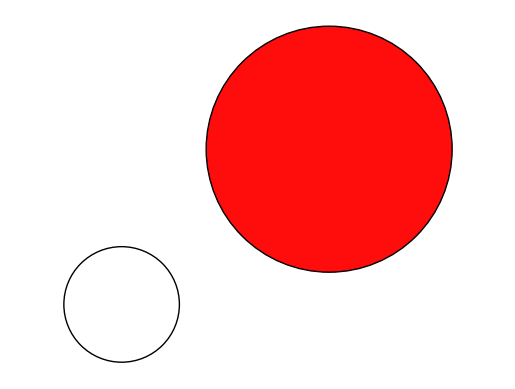

In [3]:
import numpy as np
from matplotlib import pyplot
from ase.lattice.surface import fcc111
from ase import Atoms
from ase.data import covalent_radii as radii
from ase.data.colors import jmol_colors
from matplotlib.patches import Circle

for x in range(len(samples)):
    counter = 0
    for y in samples[x]:

        fig, ax = pyplot.subplots()

        # Make the atoms; rotate so they are viewable with no z coordinates.
        pos = y
        atoms = Atoms(['H','H','O'], (pos[3:6], pos[0:3], pos[6:9]))
        atoms.rotate('x', -np.pi/2., rotate_cell=True)

        # Add the atoms to the plot as circles.
        for atom in atoms:
            color = jmol_colors[atom.number]
            radius = radii[atom.number]
            circle = Circle((atom.x, atom.y), radius, facecolor=color,
                                    edgecolor='k', linewidth=1)
            ax.add_patch(circle)

        # Enforce the circles are round (equal x and y scales) and turn off
        # tickmarks.
        ax.axis('equal')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')

        fig.savefig('./Diff_visualization/out_' + str(times[x]) + '_' + str(counter) + '.png')
        counter += 1

In [10]:
len(samples[1])

32

In [23]:
angles_all

[[21.62814149091504,
  95.90688216210478,
  19.62390212954583,
  87.61876166089948,
  79.35067502466411,
  21.780876128302516,
  26.234915403552595,
  23.50446273490016],
 [77.02733000206558,
  37.937077774435565,
  22.593615907747367,
  25.110722316592778,
  102.64427085117076,
  55.491182372847504,
  61.670672367490106,
  84.46815739787552],
 [45.83742487620475,
  26.98479428790176,
  15.826637612678672,
  58.26384209087388,
  167.68881206752857,
  63.14834861411102,
  52.30228723108203,
  45.98070880914704],
 [26.873596938588488,
  69.31426667655869,
  43.702157392244324,
  60.88918545776955,
  4.957253978517376,
  27.10552219083776,
  99.294309481953,
  30.379666158371556],
 [120.28248301520712,
  98.85810676080264,
  57.7045915929118,
  60.898212368895585,
  20.88052950352047,
  102.29417901244898,
  99.16770489088418,
  60.05124460342509],
 [112.0747164762658,
  64.7699181510625,
  75.7010117026692,
  104.41017177754655,
  50.02533292216766,
  49.299740782879105,
  42.00319954601

In [11]:

samples[5000]

array([[10361.255,  9943.403, 46591.11 , 10676.589,  9913.408, 46147.12 ,
        10020.979, 10504.764, 46405.824, 10981.03 , 10455.517, 47136.87 ,
        10912.782, 10753.933, 47511.934, 10743.895, 10544.438, 46885.89 ]],
      dtype=float32)

In [17]:
import numpy as np
x = np.arange(1, 18)
x= torch.Tensor(x)
x = torch.rand_like(x)
x

tensor([0.5802, 0.2500, 0.3559, 0.2723, 0.1486, 0.3630, 0.3185, 0.1043, 0.3354,
        0.2862, 0.0592, 0.4565, 0.1952, 0.7465, 0.8963, 0.9836, 0.2770])

In [ ]:
import os
import sys
from typing import Dict, List
import numpy as np
import pandas as pd
from copy import deepcopy
import mdtraj as md
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader as PyGDataLoader

from torchvision.io import read_image
# pos_data = pd.read_csv("/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv")

data_dir = "/home/cmu/Desktop/Summer_research/position_data_2.csv"

class Diffusion_Dataset(Dataset):
    def __init__(self, data_dir: str, sys_dir = None, name = "circular_22_"):
        super(Diffusion_Dataset, self).__init__()
        self.data_dir = data_dir
        self.name = name
        sys_data = pd.read_csv("/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv")
        sys_file_names = sys_data["sys_filename"]
        # data_dir = "/home/cmu/Desktop/Summer_research/position_data_2.csv"
        # sys_dir = "/home/cmu/Desktop/Summer_research/sys_pdb/"
        # name = "circular_22_"

        positions = []
        pos_2_data = pd.read_csv(self.data_dir)
        timestamps = pos_2_data["names"].values

        for x in range(len(timestamps)):
            file_name = name+str(timestamps[x])
            traj = md.load_pdb(sys_dir+file_name+".pdb")
            pos = traj.xyz[0].flatten()
            positions.append(pos)

        ### normalize positions
        # mean, std, var = np.mean(positions), np.std(positions), np.var(positions)
        # # print(mean, std, var)
        # positions = (positions - mean)/std
        # mean, std, var = np.mean(positions), np.std(positions), np.var(positions)
        # print(mean, std, var)
        
        ### Normalization done
        positions = np.array(positions)
        previous = positions[:-1]
        displacements=(positions[1:] - previous)                  
        self.positions = np.array(positions, dtype = np.float32)
        self.labels = np.array(displacements, dtype = np.float32)
        # self.labels.append(np.zeros_like(self.labels[0]))

        print(self.labels.shape)
        self.len = len(self.labels)

    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        return self.positions[index] , self.labels[index]
    



Diffusion_Data = Diffusion_Dataset(
    data_dir = "/home/cmu/Desktop/Summer_research/position_data_2.csv",
    sys_dir = "/home/cmu/Desktop/Summer_research/sys_pdb/",
    name = "circular_22_",
)

train_size = int(0.8 * len(Diffusion_Data))
test_size = len(Diffusion_Data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(Diffusion_Data, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
e = 0
print(len(train_dataloader))
print((next(enumerate(train_dataloader))[1][1][2]))
